# Spectral Analysis

Time taken to solve this problem on a 2013 MacBook Pro:
**52min 32s**.

More time steps so that we can do spectral analysis for higher frequencies.

## Define the Problem

From [Two-Level: Weak Pulse through Few Atoms with Decay, More Time Steps][0]

[0]: ../examples/mb-solve-two-weak-pulse-few-atoms-decay-more-tsteps.ipynb

In [1]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 1.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": {
          "ampl_1": 1.0,
          "centre_1": 0.0,
          "fwhm_1": 1.0
        },
        "rabi_freq_t_func": "gaussian_1"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 12000,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 1,
  "num_density_z_func": "square_1",
  "num_density_z_args": {
    "on_1": 0.0,
    "off_1": 1.0,
    "ampl_1": 1.0
  },
  "interaction_strengths": [
    1.0
  ],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-two-weak-pulse-few-atoms-decay-more-tsteps"
}
"""

In [2]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

## Solve the Problem

Note that recalculating this problem with lots of time steps can take a long time. About an hour on 2013 MacBook Pro.

In [3]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False, pbar_chunk_size=2)

Loaded tuple object.
CPU times: user 50.5 ms, sys: 193 ms, total: 244 ms
Wall time: 279 ms


## Field Output, Time Domain

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

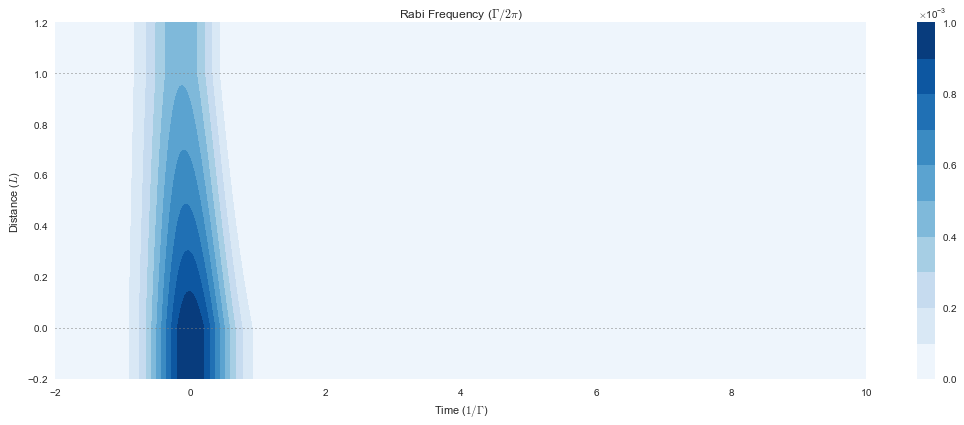

In [5]:
fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)

## Spectral Analysis

In [6]:
from maxwellbloch import spectral

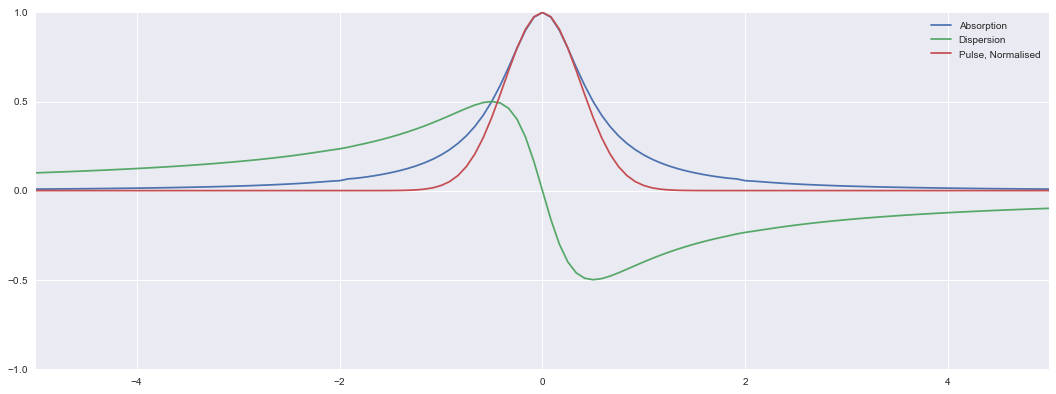

In [7]:
fig = plt.figure(2, figsize=(16, 6))
ax = fig.add_subplot(111)

freq_list = spectral.freq_list(mb_solve_00)
rabi_freq_abs_0 = np.abs(spectral.rabi_freq(mb_solve_00, 0))[0]

ax.plot(freq_list, spectral.absorption(mb_solve_00, 0, -1), 
        label='Absorption')
ax.plot(freq_list, spectral.dispersion(mb_solve_00, 0, -1), 
        label='Dispersion')
ax.plot(freq_list, 
        rabi_freq_abs_0/np.max(rabi_freq_abs_0),
        label='Pulse, Normalised')
ax.set_xlim(-5.0, 5.0)
ax.set_ylim(-1.0, 1.0)
ax.legend()

## Comparing with Analytic Results

See page 46 of my thesis, Equation 2.61

$$
\frac{k}{2} \chi({\omega}) = -Ng \frac{1}{\mathrm{i}\frac{\Gamma}{2} + \omega}
$$

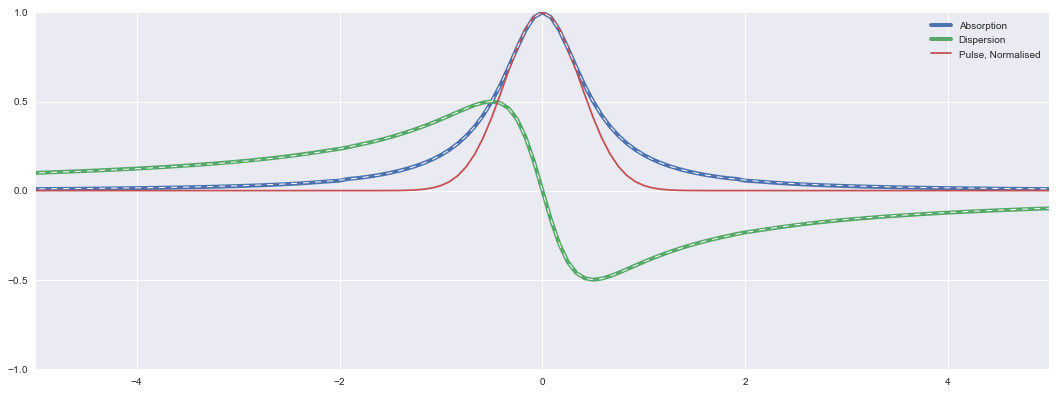

In [8]:
absorption_linear_known = spectral.absorption_two_linear_known(freq_list, 1.0, 1.0)
dispersion_linear_known = spectral.dispersion_two_linear_known(freq_list, 1.0, 1.0)

fig = plt.figure(4, figsize=(16, 6))
ax = fig.add_subplot(111)

ax.plot(freq_list, spectral.absorption(mb_solve_00, 0, -1), 
        label='Absorption', lw=4.0)
ax.plot(freq_list, spectral.dispersion(mb_solve_00, 0, -1), 
        label='Dispersion', lw=4.0)

ax.plot(freq_list, 
        rabi_freq_abs_0/np.max(rabi_freq_abs_0),
        label='Pulse, Normalised')

ax.plot(freq_list, absorption_linear_known, ls='dashed', c='white', lw=1.0)
ax.plot(freq_list, dispersion_linear_known, ls='dashed', c='white', lw=1.0)

ax.set_xlim(-5.0, 5.0)
ax.set_ylim(-1.0, 1.0)

ax.legend()
plt.savefig('images/C-spectral-analysis.png');

The known analytic lineshapes are dashed white over the simulated lineshapes. We see good agreement. This result tells us that the computational scheme designed to model propagation of light in atomic media is accurate in the linear regime, which gives us confidence in the scheme for going beyond this weak field limit.